In [67]:
%matplotlib inline
import scipy.stats as stats
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-darkgrid')

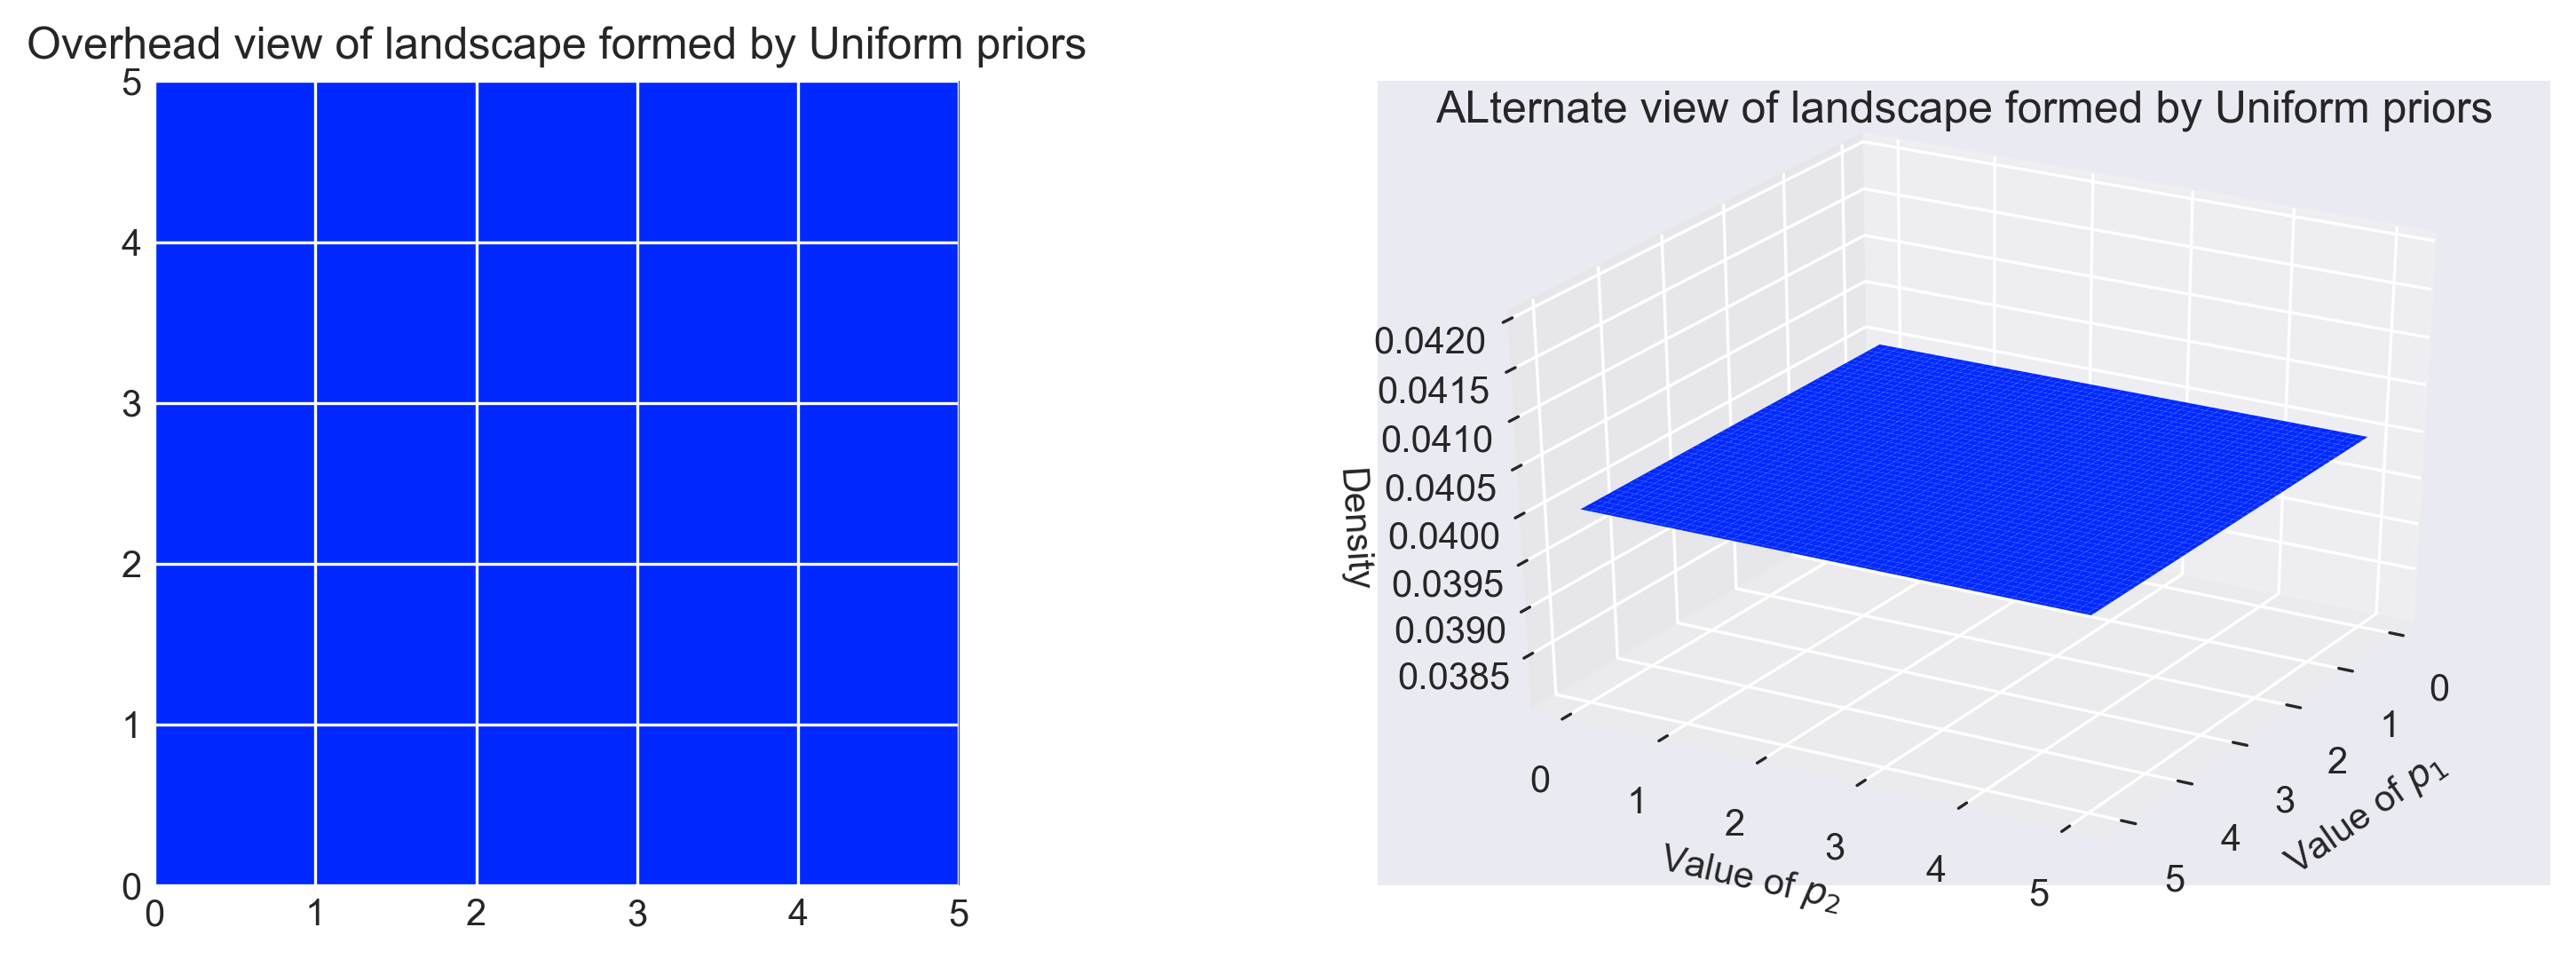

In [68]:
jet = plt.cm.jet
fig = plt.figure()

x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(121)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(y, loc=0, scale=5)
M = np.dot(uni_y[:, None], uni_x[None, :])
im = plt.imshow(M, interpolation='none', origin='lower', cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title('Overhead view of landscape formed by Uniform priors')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet, vmax=1, vmin=-.15)
ax.view_init(azim=390)
ax.set_xlabel('Value of $p_1$')
ax.set_ylabel('Value of $p_2$')
ax.set_zlabel('Density')
plt.title('ALternate view of landscape formed by Uniform priors')

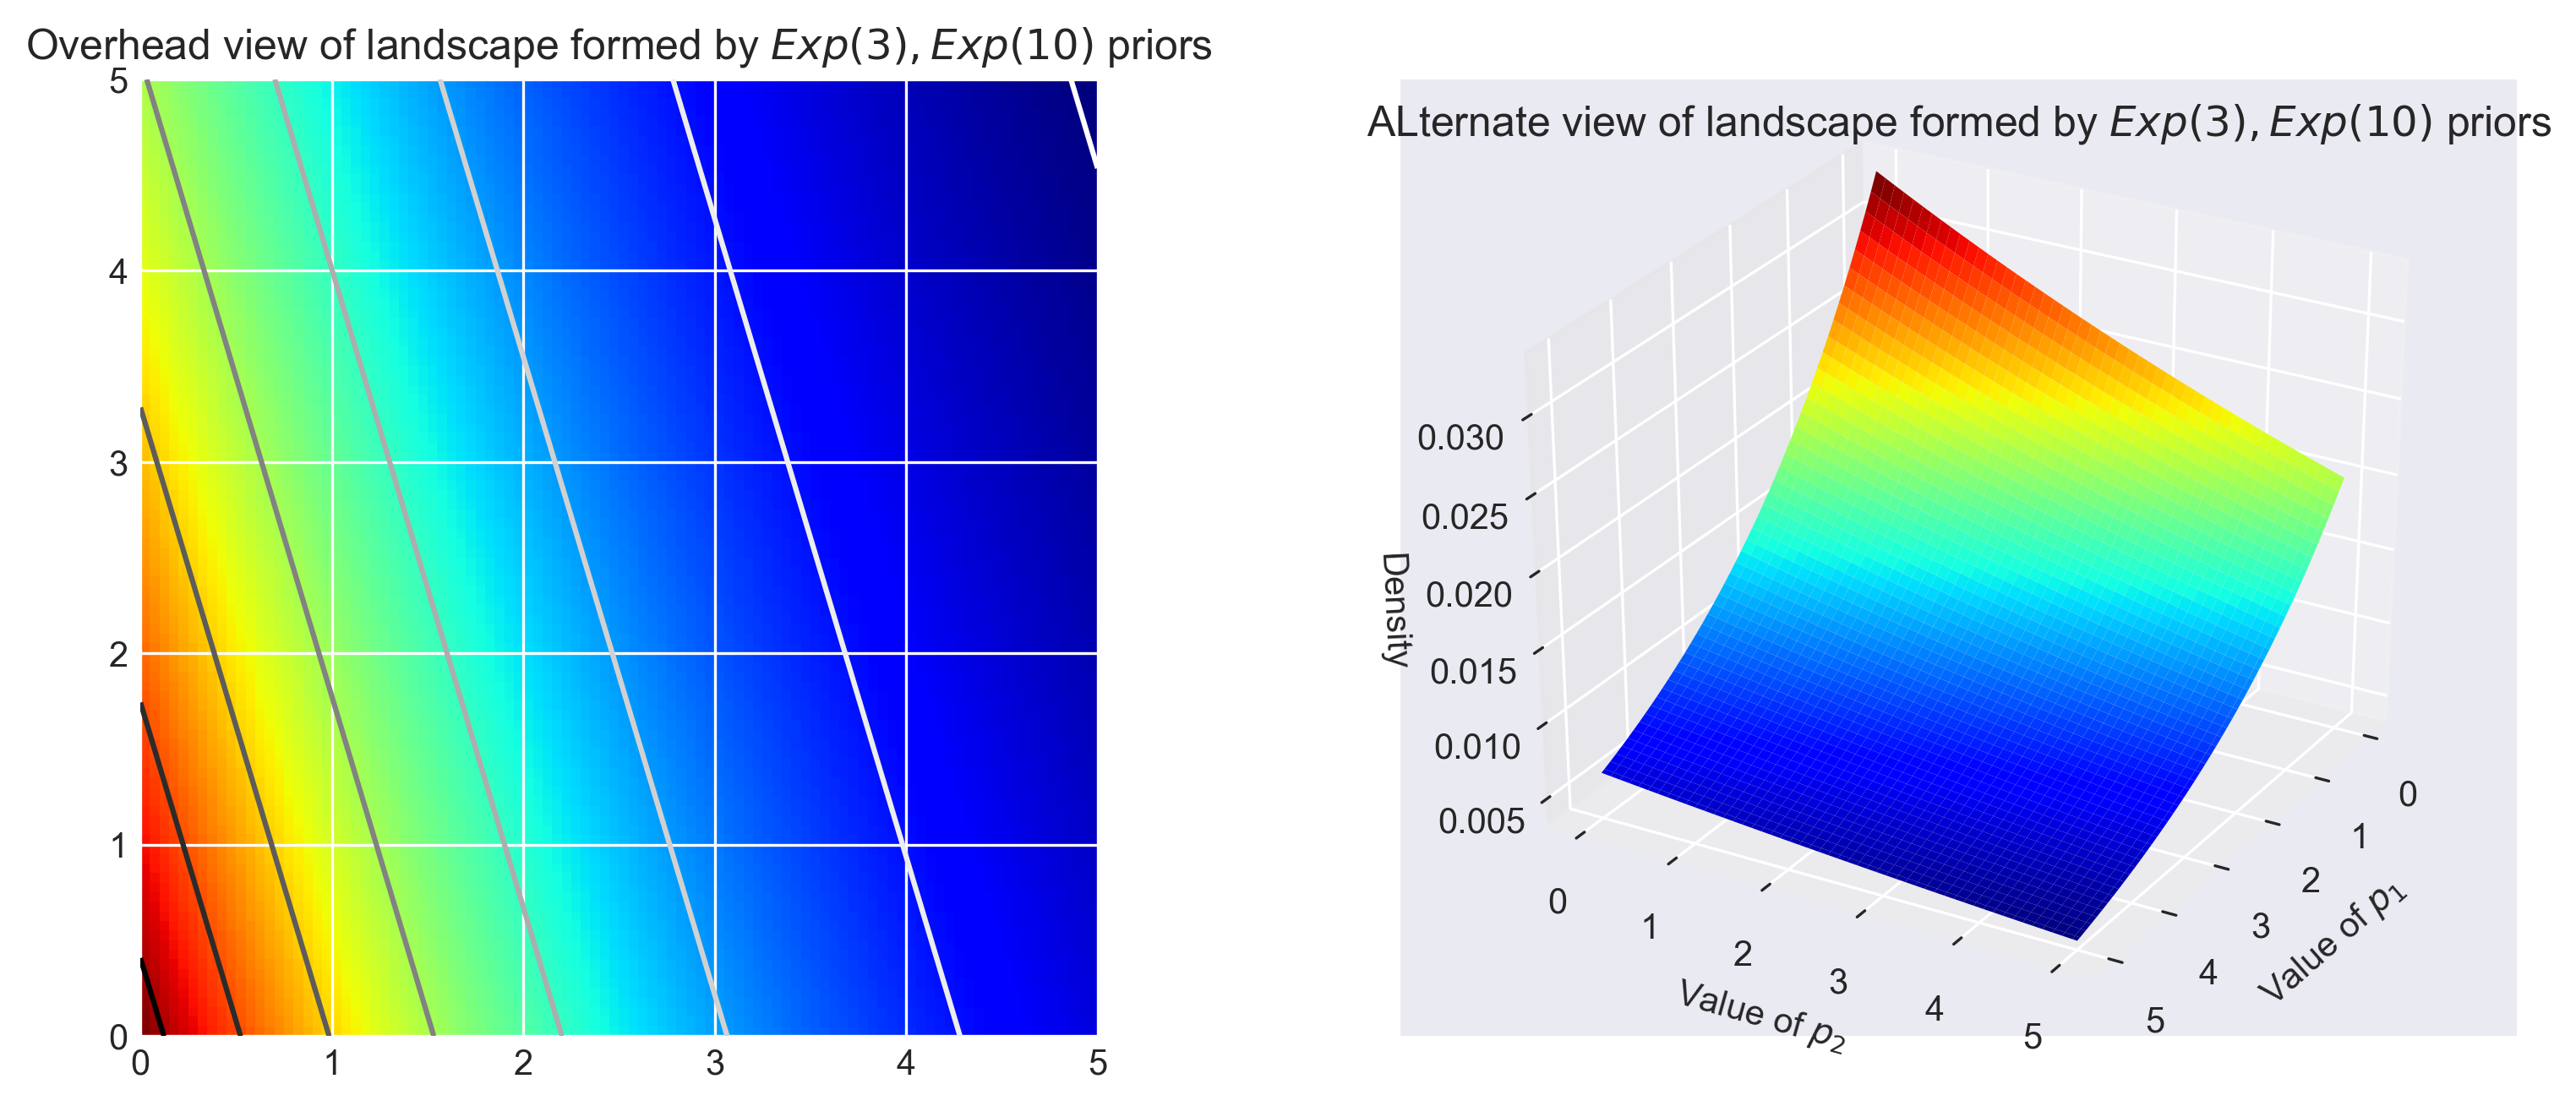

In [69]:
figsize(12.5, 5)
fig = plt.figure()

plt.subplot(121)
exp_x = stats.expon.pdf(x, scale=3)
exp_y = stats.expon.pdf(x, scale=10)
M = np.dot(exp_y[:, None], exp_x[None, :]) # combination probability
CS = plt.contour(X, Y, M)
im = plt.imshow(M, interpolation='none', origin='lower', cmap=jet, extent=(0, 5, 0, 5))
plt.title('Overhead view of landscape formed by $Exp(3), Exp(10)$ priors')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet)
ax.view_init(azim=390)
ax.set_xlabel('Value of $p_1$')
ax.set_ylabel('Value of $p_2$')
ax.set_zlabel('Density')
plt.title('ALternate view of landscape formed by $Exp(3), Exp(10)$ priors')

### Inference with different prior distributions

In [108]:
# create observed data

def test(N):

    # sample size
    #N = 100

    # the true parameters
    lambda_1_true = 1
    lambda_2_true = 3

    # generate data
    data = np.concatenate([
        stats.poisson.rvs(lambda_1_true, size=(N, 1)),
        stats.poisson.rvs(lambda_2_true, size=(N, 1))
    ], axis=1)

    print('observed: {}'.format(data))

    # plot details
    x = y = np.linspace(0.01, 5, 100)
    likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x) for _x in x]).prod(axis=1)
    likelihood_y = np.array([stats.poisson.pmf(data[:, 1], _y) for _y in y]).prod(axis=1)
    L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

    # likelihood
    #figsize(12.5, 4)
    #plt.plot(x, likelihood_x)
    #plt.plot(y, likelihood_y)

    # uniform priors
    figsize(12.5, 12)

    plt.subplot(221)
    uni_x = stats.uniform.pdf(x, loc=0, scale=5)
    uni_y = stats.uniform.pdf(y, loc=0, scale=5)
    M = np.dot(uni_x[:, None], uni_y[None, :])
    im = plt.imshow(M, interpolation='none', origin='lower', 
                    cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))
    plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolors='none')
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.title('Landscape formed by Uniform priors on $p_1, p_2$.')

    # uniform priors and observed data
    plt.subplot(223)
    plt.contour(x, y, M * L)
    im = plt.imshow(M * L, interpolation='none', origin='lower', 
                    cmap=jet, extent=(0, 5, 0, 5))
    plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolors='none')
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.title('Landscape wrapped by {} data observation; Uniform priors on $p_1, p_2$.'.format(N))

    # exponential priors
    plt.subplot(222)
    exp_x = stats.expon.pdf(x, loc=0, scale=3)
    exp_y = stats.expon.pdf(y, loc=0, scale=10)
    M = np.dot(exp_x[:, None], exp_y[None, :])
    plt.contour(x, y, M)
    im = plt.imshow(M, interpolation='none', origin='lower', cmap=jet, extent=(0, 5, 0, 5))
    plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolors='none')
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.title('Landscape formed by Exponential priors on $p_1, p_2$.')

    # exponential priors and observed data
    plt.subplot(224)
    plt.contour(x, y, M * L)
    im = plt.imshow(M * L, interpolation='none', origin='lower', cmap=jet, extent=(0, 5, 0, 5))
    plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolors='none')
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.title('Landscape wrapped by {} data observation; Exponential priors on $p_1, p_2$.'.format(N))

### Test with various numbers of observed data.
- The bigger the number, the more accurate the inference.

- With one observed data.

observed: [[3 4]]


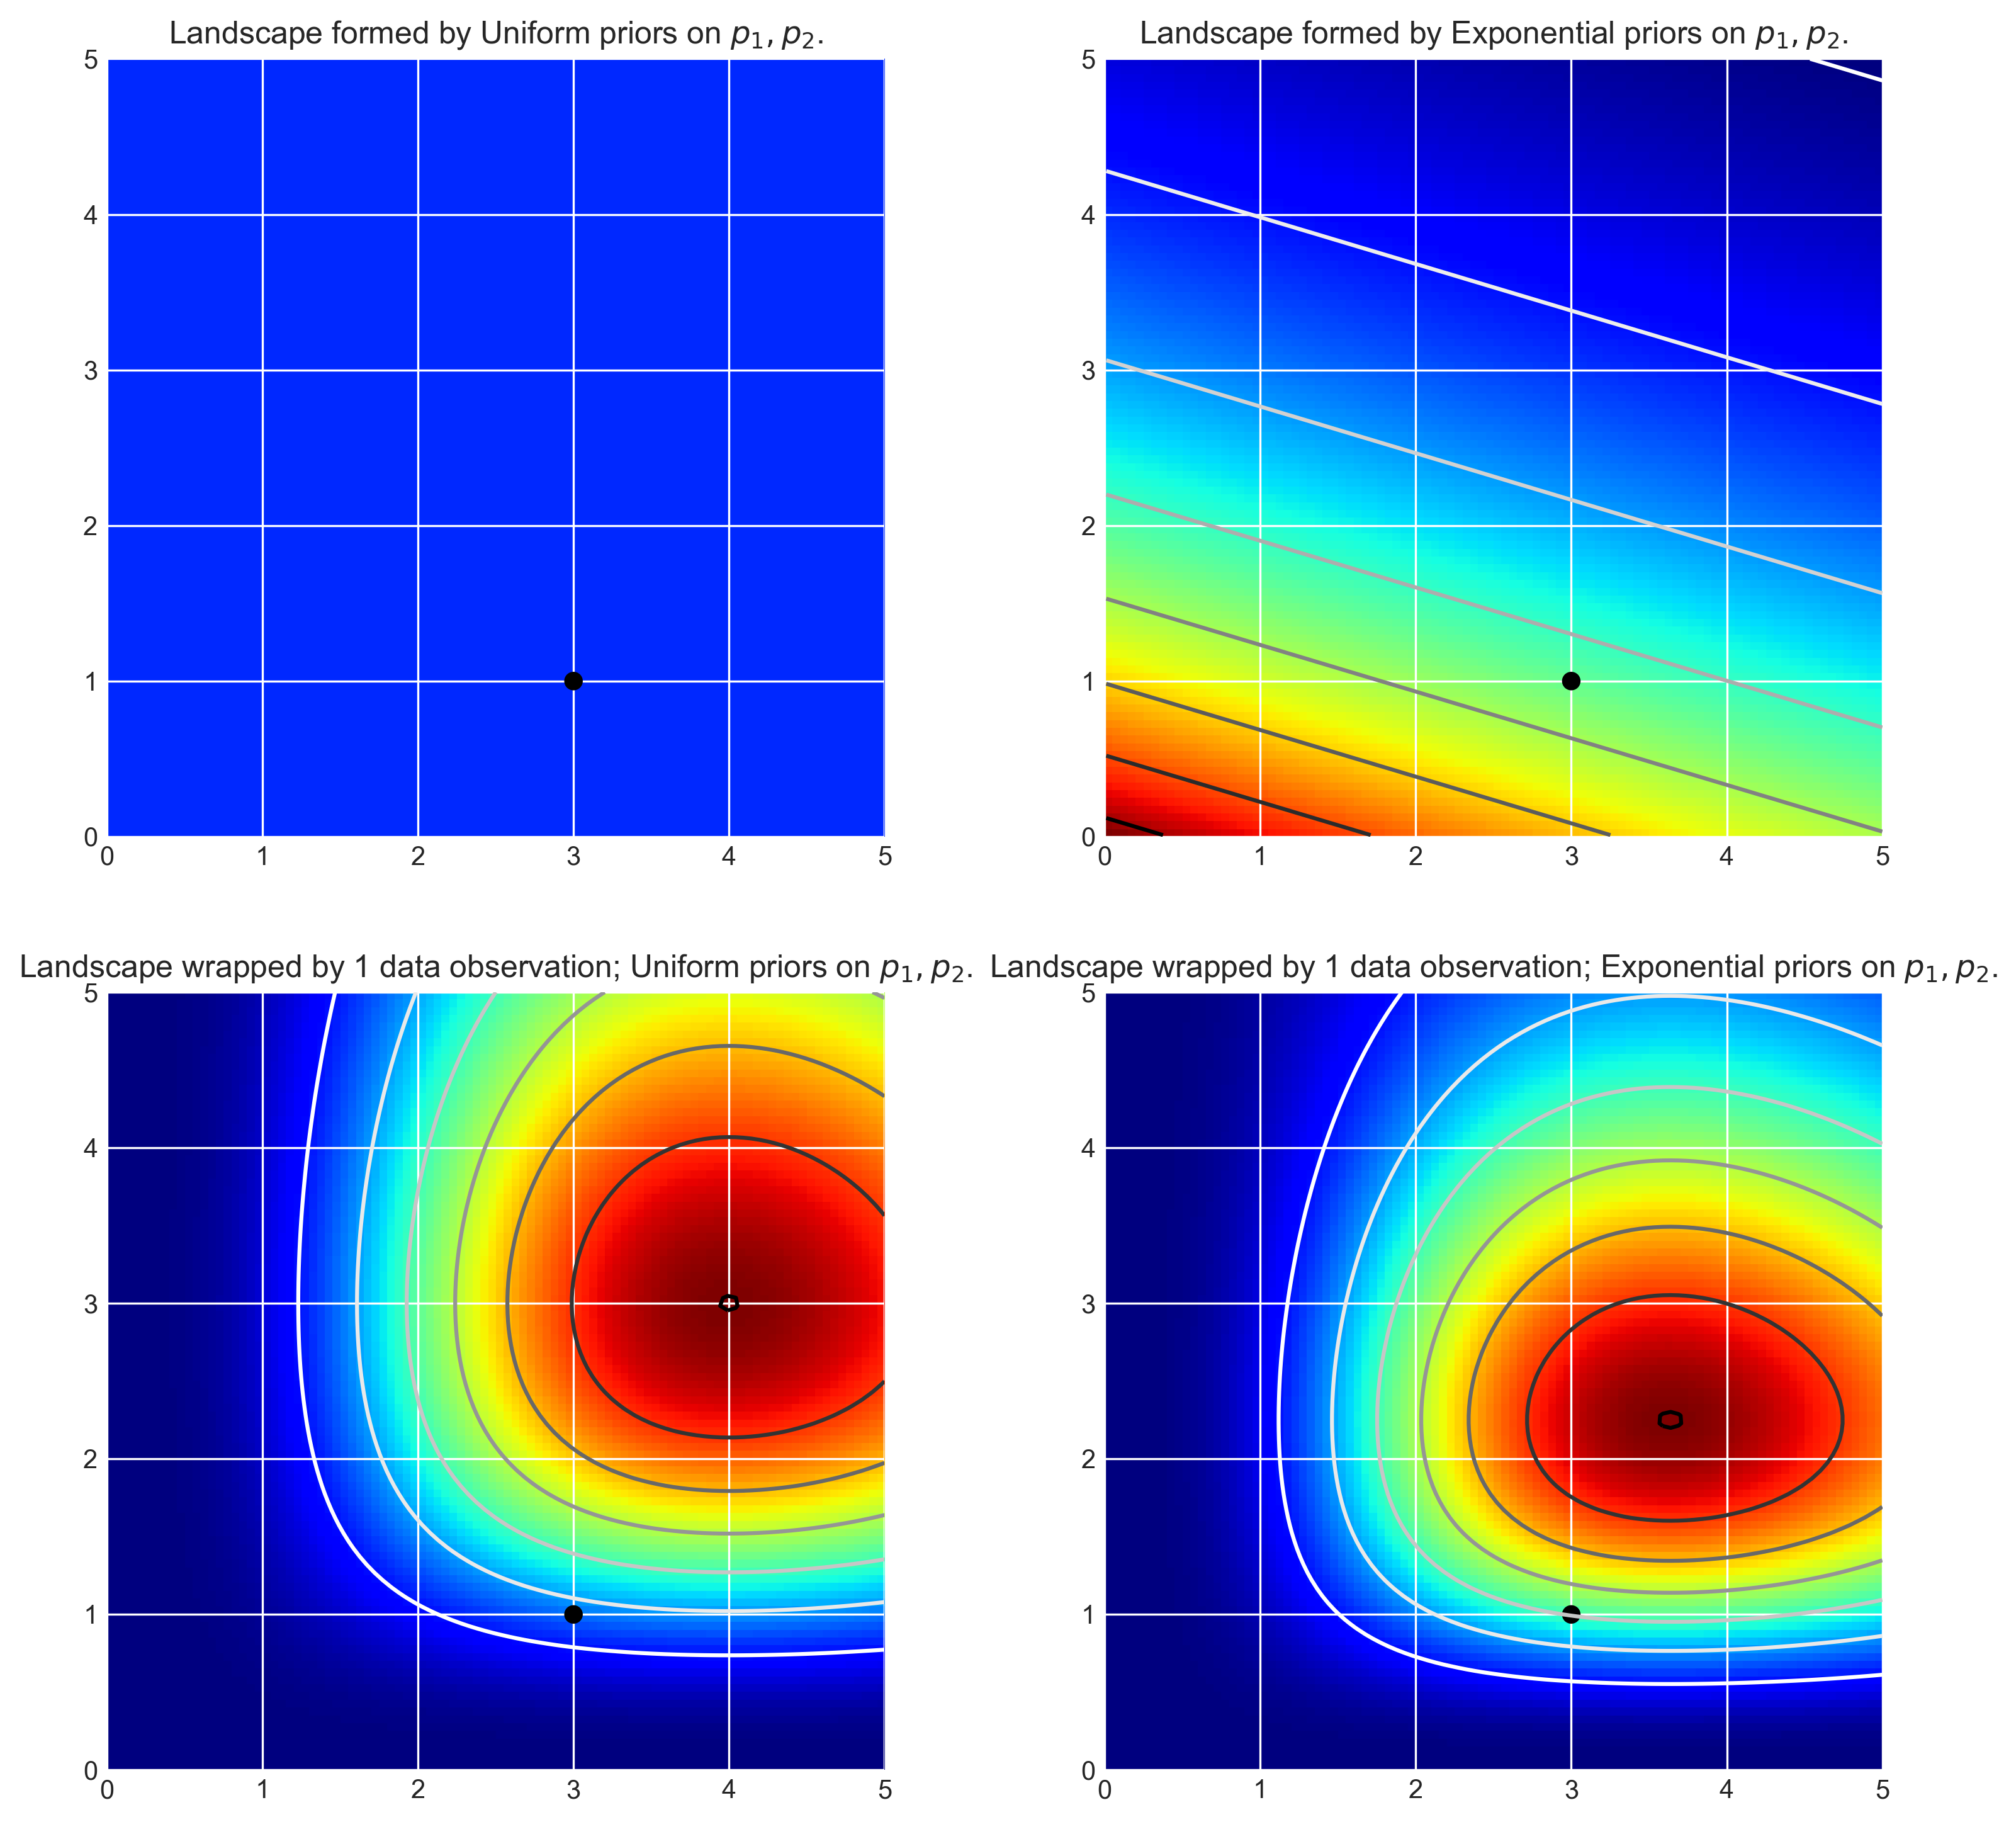

In [109]:
test(1)

- With 10 observed data.

observed: [[0 5]
 [1 3]
 [0 6]
 [0 2]
 [2 3]
 [0 1]
 [1 2]
 [1 4]
 [1 5]
 [2 2]]


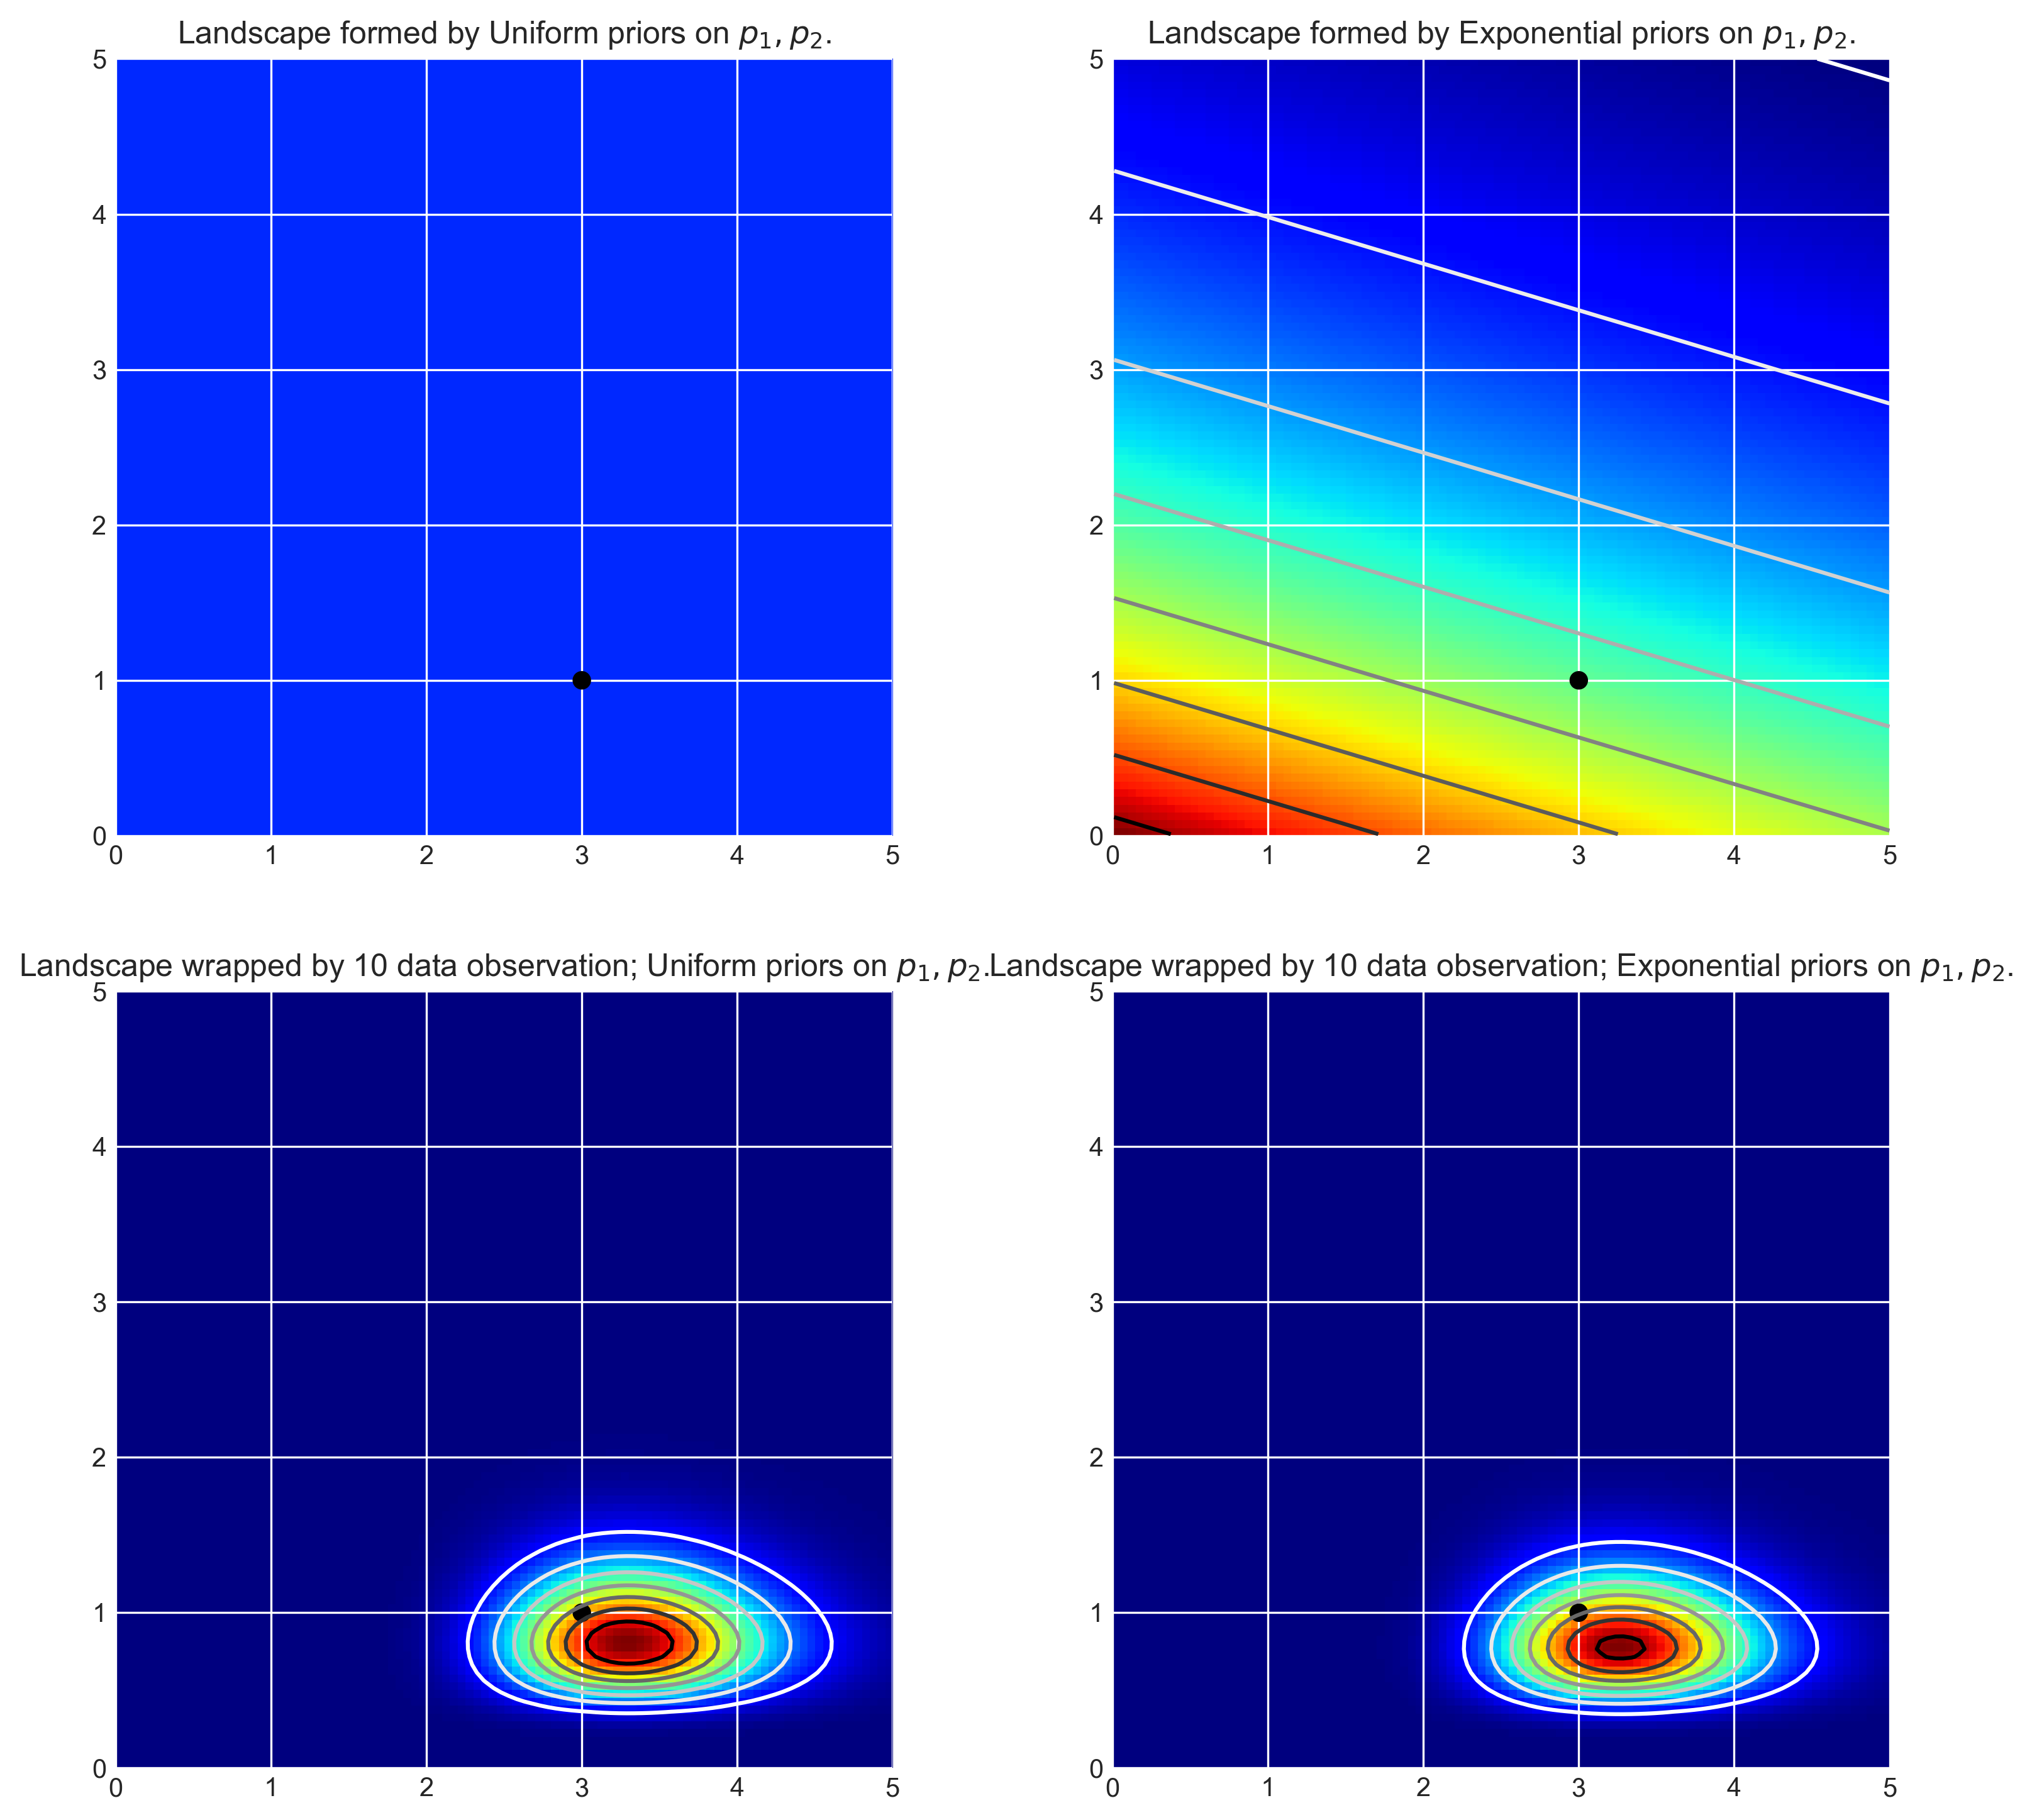

In [110]:
test(10)

- With 100 observed data.

observed: [[2 2]
 [0 4]
 [2 5]
 [1 6]
 [1 1]
 [0 5]
 [0 3]
 [2 6]
 [2 4]
 [0 1]
 [0 5]
 [3 0]
 [1 5]
 [0 5]
 [0 1]
 [1 0]
 [3 1]
 [0 0]
 [1 3]
 [0 4]
 [2 2]
 [1 2]
 [2 3]
 [0 4]
 [1 1]
 [3 5]
 [0 0]
 [1 4]
 [2 2]
 [1 7]
 [2 1]
 [2 7]
 [0 3]
 [1 7]
 [0 6]
 [1 5]
 [2 3]
 [1 2]
 [1 7]
 [0 1]
 [0 4]
 [3 5]
 [0 4]
 [0 4]
 [1 4]
 [0 3]
 [2 4]
 [1 1]
 [0 0]
 [0 4]
 [2 4]
 [2 3]
 [1 4]
 [1 3]
 [2 3]
 [0 2]
 [1 5]
 [0 1]
 [0 3]
 [3 4]
 [1 2]
 [1 5]
 [1 6]
 [0 2]
 [2 7]
 [0 3]
 [3 2]
 [0 2]
 [1 2]
 [0 5]
 [2 7]
 [0 2]
 [0 3]
 [1 2]
 [1 3]
 [1 1]
 [1 2]
 [0 5]
 [2 2]
 [0 1]
 [0 4]
 [0 4]
 [1 2]
 [2 4]
 [0 2]
 [2 5]
 [1 4]
 [1 0]
 [0 2]
 [1 3]
 [1 5]
 [1 4]
 [2 5]
 [1 3]
 [2 5]
 [0 2]
 [4 3]
 [1 3]
 [0 1]
 [1 5]]


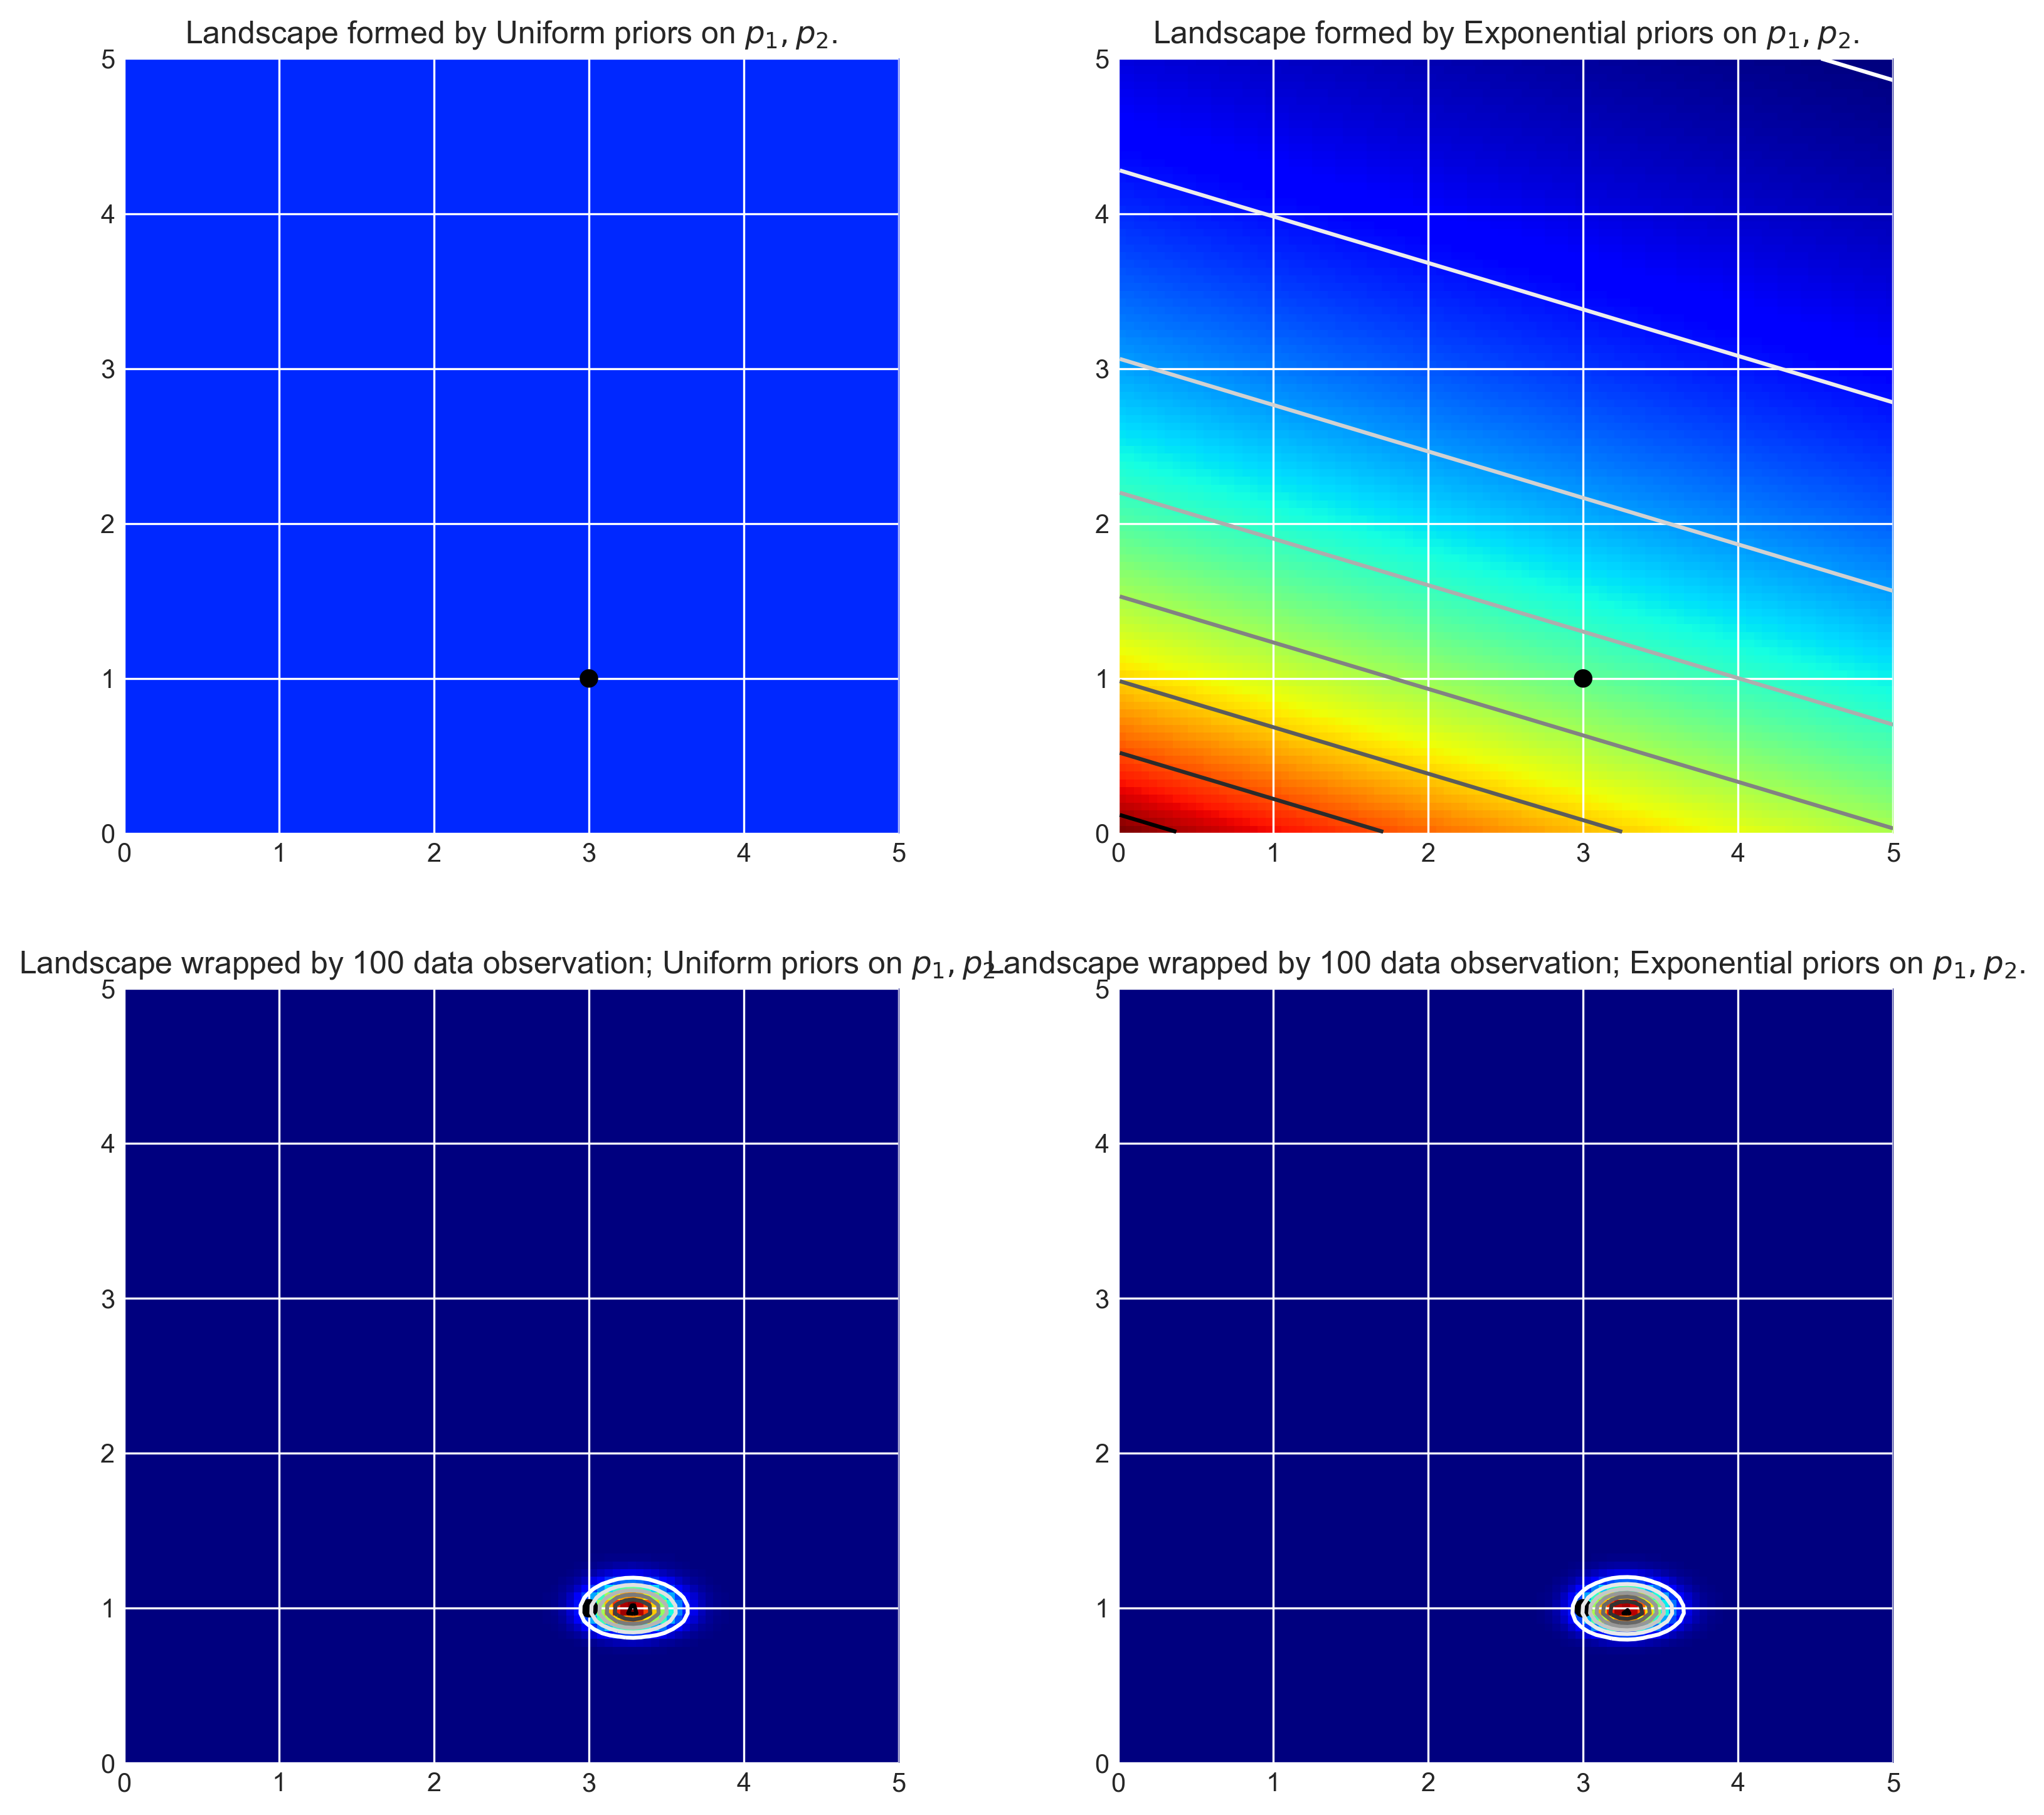

In [111]:
test(100)